
# Face Recognition using Yale Database
# Models
1.   Lenet
2.   Vggnet

# Dataset
Dataset containing cropped images are downloaded from the given 
Link [Yale Face Database](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html). 

There are 39 folders inside cropped images , the ratio for test and train is 70:30

Train Data : Train data contains the 1719 images of each class

Test Data : Test data contains 733 images of each class 

The data uploaded in google drive is accessible through following [link ](https://drive.google.com/drive/folders/1IwNqAUiIOWhU9w-e95HNctlo5xZ1woWO?usp=sharing)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Conversion of Images to another extension if needed 

In [ ]:

#import os,sys
#folder = '/content/drive/MyDrive/DIP/Assignment2/TTSplit/test'
#for filename in os.listdir(folder):
#       infilename = os.path.join(folder,filename)
#       if not os.path.isfile(infilename): continue
#       oldbase = os.path.splitext(filename)
#       newname = infilename.replace('.jpg', '.pgm')
#       output = os.rename(infilename, newname)

#import os,sys
#folder = '/content/drive/MyDrive/DIP/Assignment2/TTSplit/train'
#for filename in os.listdir(folder):
#       infilename = os.path.join(folder,filename)
#       if not os.path.isfile(infilename): continue
#       oldbase = os.path.splitext(filename)
#       newname = infilename.replace('.jpg', '.pgm')
#       output = os.rename(infilename, newname)



## Data Loading and Preprocessing 

In [1]:
# data directory path
import os
import pathlib
data_dir = os.path.join("/content/drive/MyDrive/DIP/Assignment2/TTSplit")
data_dir = pathlib.Path(data_dir)

In [2]:
# Counting the training images
count_training_images = len(list(data_dir.glob('train/*.pgm')))
count_training_images

1719

In [ ]:
# Conversion of training images to numpy arrays and store in folders , later we will load stored files and process it further 

import IPython.display as display
from PIL import Image
import numpy as np
numbers = list(data_dir.glob('train/*.pgm'))
images_list = []
images_labels = []
for image_path in numbers[:count_training_images]:
    image = Image.open(str(image_path))
    image = image.resize((28,28))
    image2 = np.asarray(image,dtype=np.uint8)
    images_list.append(image2)
    images_labels.append(os.path.basename(image_path)[5:7])
np.save('/content/drive/MyDrive/DIP/Assignment2/TTSplit/x_train',np.array(images_list))
np.save('/content/drive/MyDrive/DIP/Assignment2/TTSplit/y_train',np.array(images_labels,dtype=np.uint8))

In [3]:
#Counting Test images 
count_test_images = len(list(data_dir.glob('test/*.pgm')))
count_test_images

733

In [ ]:
#Conversion of testing images to numpy arrays and store in folders , later we will load stored files and process it further 

import IPython.display as display
from PIL import Image
import numpy as np
numbers = list(data_dir.glob('test/*.pgm'))
images_list = []
images_labels = []
for image_path in numbers[:count_test_images]:
    image = Image.open(str(image_path))
    image = image.resize((28,28))
    image2 = np.asarray(image,dtype=np.uint8)
    images_list.append(image2)
    images_labels.append(os.path.basename(image_path)[5:7])
np.save('/content/drive/MyDrive/DIP/Assignment2/TTSplit/x_test',np.array(images_list))
np.save('/content/drive/MyDrive/DIP/Assignment2/TTSplit/y_test',np.array(images_labels,dtype=np.uint8))

In [4]:
# Import libraries 
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import IPython.display as display
from PIL import Image
import numpy as np

In [5]:
#Load  the numpy files form storage 
X_train = np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/x_train.npy')
y_train = np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/y_train.npy')
X_valid = np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/x_test.npy')
y_valid = np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/y_test.npy')

In [6]:
#Print the number of images and shape of images in train and test folder
#All images are now resize 28,28
print('Training data shape',X_train.shape)
print('Training labels shape',y_train.shape)
print('Testing data shape',X_valid.shape)
print('Testing labels shape',y_valid.shape)

Training data shape (1719, 28, 28)
Training labels shape (1719,)
Testing data shape (733, 28, 28)
Testing labels shape (733,)


In [7]:
# Method 2 for printing shape
print(np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/x_train.npy').shape)
print(np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/y_train.npy').shape)
print(np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/x_test.npy').shape)
print(np.load('/content/drive/MyDrive/DIP/Assignment2/TTSplit/y_test.npy').shape)

(1719, 28, 28)
(1719,)
(733, 28, 28)
(733,)


In [8]:
#Declare X_train and X_validation 
X_train = X_train.reshape(1719, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(733, 28, 28, 1).astype('float32')

In [9]:
#Normalize
X_train /= 255
X_valid /= 255

In [10]:
#Declare X_train and X_validation 
n_classes = 40
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [11]:
#Again printing 
#This time number of classes are also present
print('Training data shape',X_train.shape)
print('Training labels shape',y_train.shape)
print('Testing data shape',X_valid.shape)
print('Testing labels shape',y_valid.shape)

Training data shape (1719, 28, 28, 1)
Training labels shape (1719, 40)
Testing data shape (733, 28, 28, 1)
Testing labels shape (733, 40)


# 1) Lenet Model
The LeNet architecture is straightforward and small, (in terms of memory footprint), making it perfect for teaching the basics of CNNs 

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

In [13]:
#Summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

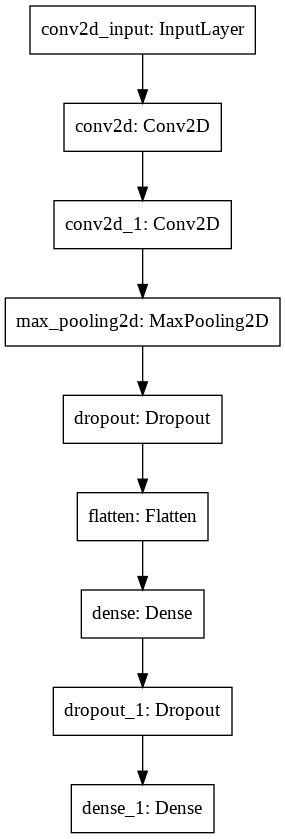

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='lenetmodel.png')

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [16]:
lenetHistory = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
14/14 [==============================] - 1s 43ms/step - loss: 3.6751 - accuracy: 0.0326 - val_loss: 3.6130 - val_accuracy: 0.0587
Epoch 2/200
14/14 [==============================] - 0s 19ms/step - loss: 3.5033 - accuracy: 0.0931 - val_loss: 3.2800 - val_accuracy: 0.1774
Epoch 3/200
14/14 [==============================] - 0s 19ms/step - loss: 2.9664 - accuracy: 0.2216 - val_loss: 2.4727 - val_accuracy: 0.4707
Epoch 4/200
14/14 [==============================] - 0s 19ms/step - loss: 2.2779 - accuracy: 0.3944 - val_loss: 1.5463 - val_accuracy: 0.6889
Epoch 5/200
14/14 [==============================] - 0s 19ms/step - loss: 1.7116 - accuracy: 0.5276 - val_loss: 1.2084 - val_accuracy: 0.7367
Epoch 6/200
14/14 [==============================] - 0s 18ms/step - loss: 1.3729 - accuracy: 0.6236 - val_loss: 0.9002 - val_accuracy: 0.8063
Epoch 7/200
14/14 [==============================] - 0s 19ms/step - loss: 1.1019 - accuracy: 0.6987 - val_loss: 0.7529 - val_accuracy: 0.8554
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


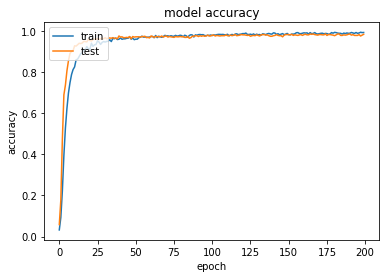

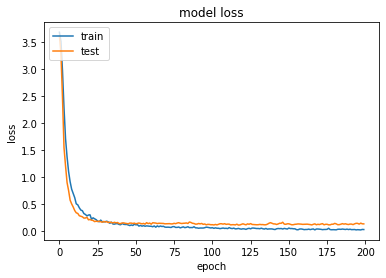

In [17]:
import matplotlib.pyplot as plt
print(lenetHistory.history.keys())
# summarize history for accuracy
plt.plot(lenetHistory.history['accuracy'])
plt.plot(lenetHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(lenetHistory.history['loss'])
plt.plot(lenetHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2) Vggnet Model

In [18]:
model = Sequential()

model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40, activation='softmax'))


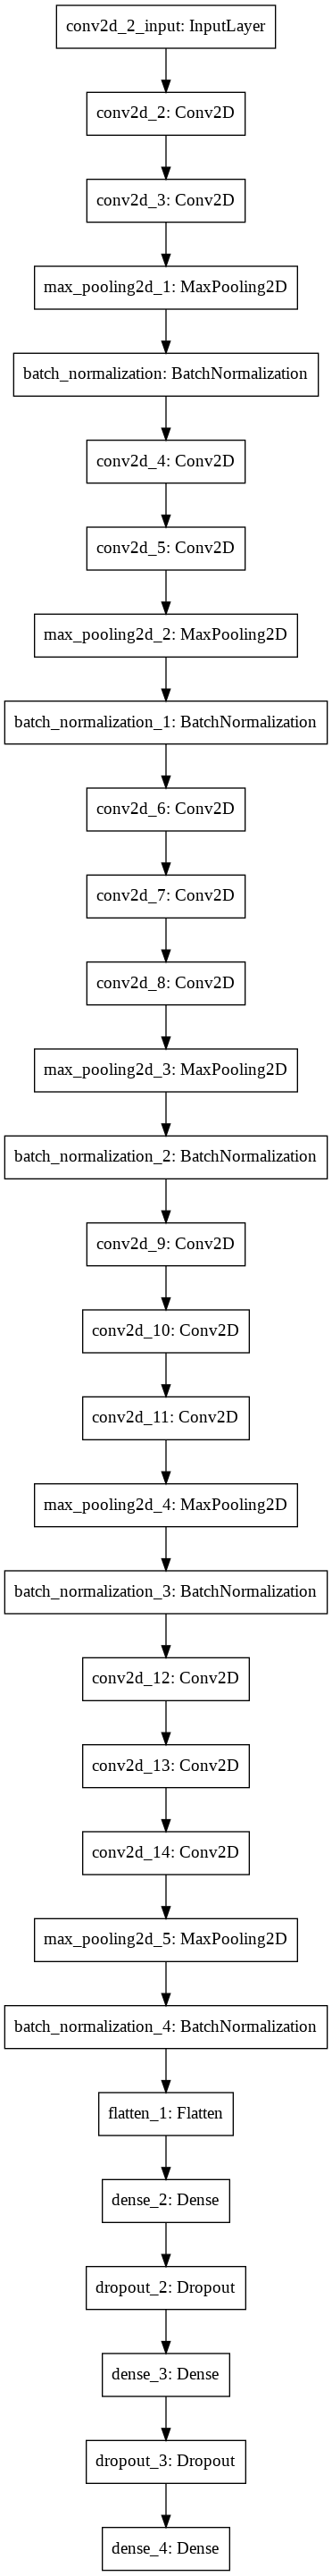

In [19]:
from keras.utils import plot_model
plot_model(model, to_file='vggnetmodel.png')

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)        

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [22]:
vggnetHistory = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
14/14 [==============================] - 4s 289ms/step - loss: 4.3292 - accuracy: 0.0413 - val_loss: 3.6834 - val_accuracy: 0.0300
Epoch 2/200
14/14 [==============================] - 2s 172ms/step - loss: 3.9201 - accuracy: 0.0401 - val_loss: 3.9842 - val_accuracy: 0.0232
Epoch 3/200
14/14 [==============================] - 2s 170ms/step - loss: 3.6558 - accuracy: 0.0529 - val_loss: 9.8375 - val_accuracy: 0.0246
Epoch 4/200
14/14 [==============================] - 2s 170ms/step - loss: 3.5814 - accuracy: 0.0529 - val_loss: 5.6378 - val_accuracy: 0.0368
Epoch 5/200
14/14 [==============================] - 2s 170ms/step - loss: 3.5004 - accuracy: 0.0588 - val_loss: 15.4775 - val_accuracy: 0.0300
Epoch 6/200
14/14 [==============================] - 2s 170ms/step - loss: 3.2711 - accuracy: 0.0948 - val_loss: 7.8108 - val_accuracy: 0.0300
Epoch 7/200
14/14 [==============================] - 2s 170ms/step - loss: 3.2167 - accuracy: 0.0960 - val_loss: 6.9153 - val_accuracy: 0.023

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


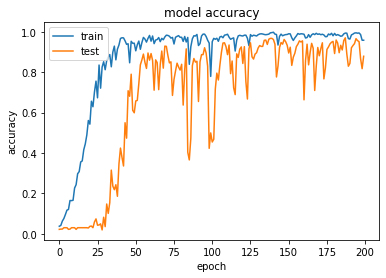

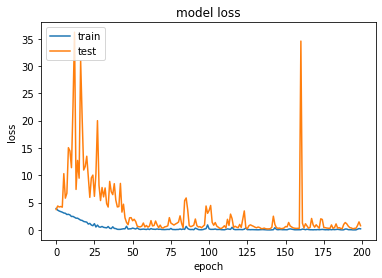

In [ ]:
import matplotlib.pyplot as plt
print(lenetHistory.history.keys())


# summarize history for accuracy
plt.plot(vggnetHistory.history['accuracy'])
plt.plot(vggnetHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(vggnetHistory.history['loss'])
plt.plot(vggnetHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

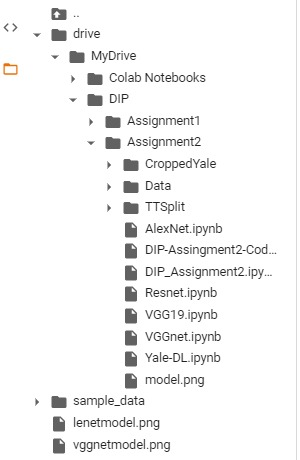